# 교재 4장 심화문제 

4.1  

1)  

선형 회귀 분석을 통해서 선형 회귀 모델의 절편과 계수를 구하여라.  
마지막으로 이 선형 회귀 모델이 입력 마력 값에 대해 연비를 예측하는데 얼마나 적합한지 예측 점수를 출력하라.

In [1]:
import numpy as np 
import pandas as pd
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

lin_data = pd.DataFrame({'Horsepower':[130, 250, 190, 300, 210, 220, 170], 'Efficiency':[16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]}, index=['A','B','C','D','E','F','G'])

lin_data.transpose()

,A,B,C,D,E,F,G
Horsepower,130.0,250.0,190.0,300.0,210.0,220.0,170.0
Efficiency,16.3,10.2,11.1,7.1,12.1,13.2,14.2


In [2]:
x = lin_data['Horsepower'].to_numpy()
y = lin_data['Efficiency'].to_numpy()

x = x[:, np.newaxis]                  # 선형회귀 모델의 입력형식에 맞게 차원을 증가시킴

In [3]:
regr = linear_model.LinearRegression()       # model 선정

regr.fit(x, y)                               # 선정한 model으로 fitting 

LinearRegression()

In [4]:
coefficients = regr.coef_                   # 계수
intercept = regr.intercept_                 # 절편
score = regr.score(x,y)                     # 예측 점수

print("계수 : {}".format(coefficients))
print("절편 : {}".format(intercept))
print("예측 점수 : {}".format(score))

계수 : [-0.05027473]
절편 : 22.58626373626374
예측 점수 : 0.8706727649378526


2)  

위의 선형 회귀 모델을 바탕으로 270 마력의 신형엔진을 가진 자동차를 개발하려 한다.  
이 자동차의 연비를 선형 회귀 모델에 적용하여 구하라.  
출력은 소수점 둘째 자리까지 출력한다.

In [5]:
test_data = [[270]]

y_pred = regr.predict(test_data)

print("{} 마력 자동차의 예상 연비 : {} km/l".format(test_data[0][0],y_pred[0].round(2)))

270 마력 자동차의 예상 연비 : 9.01 km/l


4.2  

1) 적절한 선형 회귀 모델을 구현하여라. 이 모델의 계수와 절편, 예측 모델의 점수를 출력하라.

In [6]:
import numpy as np 
import pandas as pd
from sklearn import linear_model  # scikit-learn 모듈을 가져온다

lin_data = pd.DataFrame({'Horsepower':[130, 250, 190, 300, 210, 220, 170], 'Weight': [1900, 2600, 2200, 2900, 2400, 2300, 2100], 'Efficiency':[16.3, 10.2, 11.1, 7.1, 12.1, 13.2, 14.2]}, index=['A','B','C','D','E','F','G'])

lin_data.transpose()

,A,B,C,D,E,F,G
Horsepower,130.0,250.0,190.0,300.0,210.0,220.0,170.0
Weight,1900.0,2600.0,2200.0,2900.0,2400.0,2300.0,2100.0
Efficiency,16.3,10.2,11.1,7.1,12.1,13.2,14.2


In [7]:
x = lin_data[['Horsepower', 'Weight']].to_numpy()
y = lin_data['Efficiency'].to_numpy()

In [8]:
regr = linear_model.LinearRegression()       # model 선정

regr.fit(x, y)                               # 선정한 model으로 fitting 

LinearRegression()

In [9]:
coefficients = regr.coef_                   # 계수
intercept = regr.intercept_                 # 절편
score = regr.score(x,y)                     # 예측 점수

print("계수 : {}".format(coefficients))
print("절편 : {}".format(intercept))
print("예측 점수 : {}".format(score))

계수 : [-0.00689189 -0.00731081]
절편 : 30.60405405405405
예측 점수 : 0.8871254041192396


2)  

위의 선형 회귀 모델을 바탕으로 270마력의 신형엔진을 가진 총중량 2500kg의 자동차를 개발하려 한다.  
이 자동차의 연비를 선형 회귀 모델에 적용하여 구하라.

In [10]:
test_data = [[270, 2500]]

y_pred = regr.predict(test_data)

print("{} 마력 {}kg 자동차의 예상 연비 : {} km/l".format(test_data[0][0], test_data[0][1], y_pred[0].round(2)))

270 마력 2500kg 자동차의 예상 연비 : 10.47 km/l


3)  

마력과 총중량, 연비 사이의 상관관계를 쌍플롯으로 그려 보라.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns    # 시각화를 위하여 Seaborn 라이브러리를 이용함

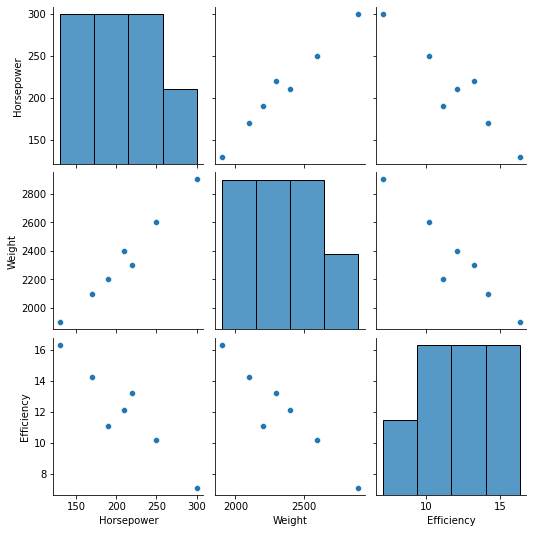

In [12]:
sns.pairplot(lin_data[['Horsepower', 'Weight', 'Efficiency']])
plt.show()  

4)  

마력과 총중량, 연비 사이의 상관관계를 seaborn의 히트맵으로 가시화해보라.

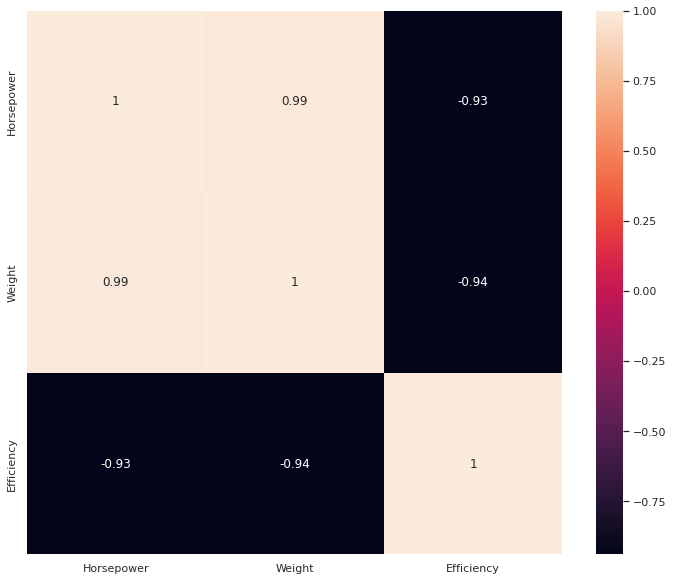

In [13]:
sns.set(rc={'figure.figsize':(12,10)})            # 상관행렬 가시
correlation_matrix = lin_data.corr().round(2)         # 상관행렬 생성
sns.heatmap(data=correlation_matrix, annot=True)
plt.show() 

5)  

마력, 총중량, 연비의 상관관계를 조사하고 이를 3개 이상의 문장으로 요약 정리하라.

가시화된 그래프나 상관계수를 통해 각각의 변량들에 대한 상관관계를 확인해보겠습니다.  
  
마력과 총중량은 양의 상관관계에 있습니다.  
즉, 마력이 높은 자동차가 총중량이 높은 경향을 보인다는 것을 의미합니다.  

마력과 연비는 음의 상관관계에 있습니다.  
즉, 마력이 높은 자동차가 연비가 낮은 경향을 보인다는 것을 의미합니다.  

총중량과 연비는 음의 상관관계에 있습니다.  
즉, 총중량이 높은 자동차가 연비가 낮은 경향을 보인다는 것을 의미합니다.  

정리하면 마력과 총중량이 양의 상관관계에 있으면서 각각이 연비와는 음의 상관관계에 있기때문에  
마력과 총중량은 연비와 음의 상관관계에 있다고 할 수 있겠습니다.